In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

Самостоятельное задание. Сделать цветовую сегментацию выданного изображения. Пороги для цветовой сегментации подобрать в ручную, используя преобразование изображения в формат LAB.

In [39]:

# Загрузка изображения
image = cv.imread('./mandarin.jpg')

# Преобразование изображения в цветовое пространство Lab

lab_image = cv.cvtColor(image, cv.COLOR_BGR2LAB)
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def segmentate(l_h, l_s, l_v, h_h, h_s, h_v):    
    lower_threshold = np.array([l_h,l_s,l_v])
    upper_threshold = np.array([h_h,h_s,h_v])
    lo_square = np.full((10, 10, 3), lower_threshold, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), upper_threshold, dtype=np.uint8) / 255.0

    mask = cv.inRange(lab_image, lower_threshold, upper_threshold)

    result = cv.bitwise_and(rgb_image, rgb_image, mask=mask)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))

    plt.figure(figsize=(15,20))
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()



#В 5й лучше бинарную маску выведи, по серому непонятно что выделяется.

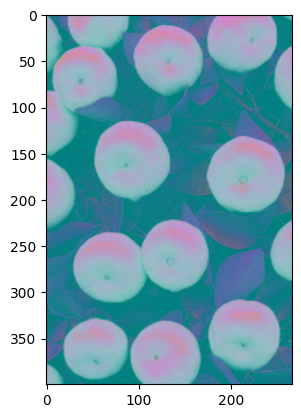

In [38]:
plt.imshow( lab_image)

In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [36]:
interact(segmentate, l_h=2, l_s=130, l_v=150, h_h=350, h_s=500, h_v=350)

interactive(children=(IntSlider(value=2, description='l_h', max=6, min=-2), IntSlider(value=130, description='…

<function __main__.segmentate(l_h, l_s, l_v, h_h, h_s, h_v)>

In [40]:
lower_blue = np.array([0,130,150])
upper_blue = np.array([350,500,350])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0



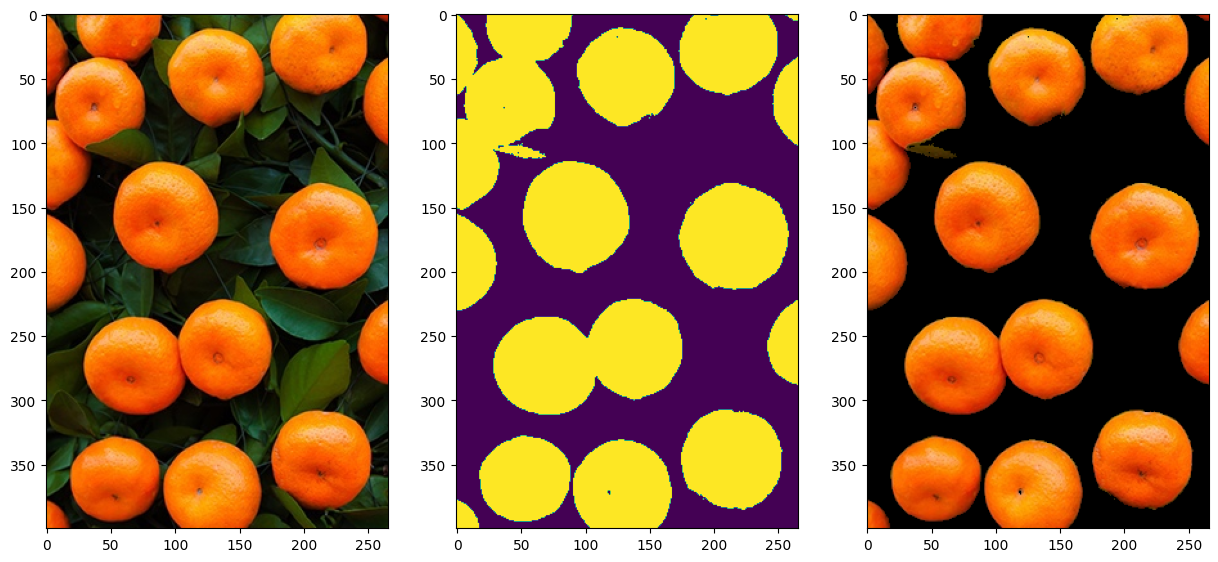

In [44]:
mask = cv.inRange(lab_image, lower_blue, upper_blue)
result = cv.bitwise_and(rgb_image, rgb_image, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()